## A11.2021.13654 - Luluk Ardianto
### Project Capstone Heart Disease


## DATASET
Dataset yang digunakan untuk penelitian sebagai berikut :

Dataset : Hungarian Dataset -> 
hungarian.data

Sumber : Klasifikasi Data Penyakit Jantung
http://archive.ics.uci.edu/dataset/45/heart+diseas

### Import Library yang akan digunakan dalam penelitian

In [1]:
# Import Library yang digunakan
import itertools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [2]:
# Membaca file dataset
dir = 'hungarian.data'
with open(dir, encoding='Latin1') as file:
    lines = [line.strip() for line in file]

# Menampilkan 10 baris pertama untuk melihat struktur data
print(lines[0:10])

['1254 0 40 1 1 0 0', '-9 2 140 0 289 -9 -9 -9', '0 -9 -9 0 12 16 84 0', '0 0 0 0 150 18 -9 7', '172 86 200 110 140 86 0 0', '0 -9 26 20 -9 -9 -9 -9', '-9 -9 -9 -9 -9 -9 -9 12', '20 84 0 -9 -9 -9 -9 -9', '-9 -9 -9 -9 -9 1 1 1', '1 1 -9. -9. name']


In [3]:
# Membuat generator untuk menggabungkan dan memecah setiap 10 baris dari 'lines'
data = itertools.takewhile(
    lambda x: len(x) == 76,  # Mengambil hanya data dengan panjang 76
    (' '.join(lines[i:(i + 10)]).split() for i in range(0, len(lines), 10))
)

# Mengubah data yang disaring menjadi DataFrame
df = pd.DataFrame.from_records(data)

# Menampilkan 5 baris pertama dari DataFrame
print(df.head())

     0  1   2  3  4  5  6   7  8    9   ...  66  67 68 69 70 71 72   73   74  \
0  1254  0  40  1  1  0  0  -9  2  140  ...  -9  -9  1  1  1  1  1  -9.  -9.   
1  1255  0  49  0  1  0  0  -9  3  160  ...  -9  -9  1  1  1  1  1  -9.  -9.   
2  1256  0  37  1  1  0  0  -9  2  130  ...  -9  -9  1  1  1  1  1  -9.  -9.   
3  1257  0  48  0  1  1  1  -9  4  138  ...   2  -9  1  1  1  1  1  -9.  -9.   
4  1258  0  54  1  1  0  1  -9  3  150  ...   1  -9  1  1  1  1  1  -9.  -9.   

     75  
0  name  
1  name  
2  name  
3  name  
4  name  

[5 rows x 76 columns]


### Validasi Data

In [4]:
# Mengganti nilai '-9' dengan NaN untuk nilai yang hilang
df.replace('-9', np.nan, inplace=True)

# Menghapus kolom terakhir dari DataFrame
df.drop(columns=df.columns[-1], inplace=True)

### Menentukan Objek Data

In [5]:
# Memilih kolom yang relevan sesuai dengan indeks yang diberikan
selected_columns = [2, 3, 8, 9, 11, 15, 18, 31, 37, 39, 40, 43, 50, 57]
df = df.iloc[:, selected_columns]

# Menambahkan nama kolom baru sesuai dengan indeks yang dipilih
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 
              'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

In [6]:
# Memeriksa jumlah nilai yang hilang (NaN) dalam dataset
print(df.isnull().sum())

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          290
thal        266
num           0
dtype: int64


In [7]:
# Menampilkan lima baris pertama dari DataFrame
print(df.head())

  age sex cp trestbps chol fbs restecg thalach exang oldpeak slope   ca thal  \
0  40   1  2      140  289   0       0     172     0       0   NaN  NaN  NaN   
1  49   0  3      160  180   0       0     156     0       1     2  NaN  NaN   
2  37   1  2      130  283   0       1      98     0       0   NaN  NaN  NaN   
3  48   0  4      138  214   0       0     108     1     1.5     2  NaN  NaN   
4  54   1  3      150  NaN   0       0     122     0       0   NaN  NaN  NaN   

  num  
0   0  
1   1  
2   0  
3   3  
4   0  


In [8]:
# Mengganti nilai yang hilang dengan nilai rata-rata untuk kolom numerik
df.fillna(df.mean(), inplace=True)

# Mengganti nilai yang hilang dengan modus untuk kolom kategori
for column in df.columns:
    if df[column].dtype == 'object':  # Jika tipe datanya adalah object (kategori)
        df[column].fillna(df[column].mode()[0], inplace=True)

# Memastikan tipe data yang sesuai
df = df.apply(pd.to_numeric, errors='ignore')

# Menampilkan informasi dataset setelah pembersihan
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    int64  
 1   sex       294 non-null    int64  
 2   cp        294 non-null    int64  
 3   trestbps  294 non-null    int64  
 4   chol      294 non-null    int64  
 5   fbs       294 non-null    int64  
 6   restecg   294 non-null    int64  
 7   thalach   294 non-null    int64  
 8   exang     294 non-null    int64  
 9   oldpeak   294 non-null    float64
 10  slope     294 non-null    int64  
 11  ca        294 non-null    int64  
 12  thal      294 non-null    int64  
 13  num       294 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.3 KB
None


C:\Users\MP25B\AppData\Local\Temp\ipykernel_7952\2376351429.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [9]:
# Memeriksa jumlah nilai yang hilang (NaN) dalam dataset
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [10]:
# Menampilkan ukuran DataFrame (jumlah baris dan kolom)
print(df.shape)

(294, 14)


In [11]:
# Menampilkan nilai unik dari kolom "num"
print(df["num"].unique())

[0 1 3 4 2]


### Membersihkan Data

In [12]:
# Menampilkan nilai korelasi absolut antara kolom "num" dengan kolom lainnya
print(df.corr()["num"].abs().sort_values(ascending=False))

num         1.000000
oldpeak     0.581325
exang       0.572328
cp          0.428710
thalach     0.369604
chol        0.260429
sex         0.223137
trestbps    0.218382
age         0.209943
fbs         0.154783
slope       0.142662
thal        0.083431
restecg     0.043634
ca          0.037492
Name: num, dtype: float64


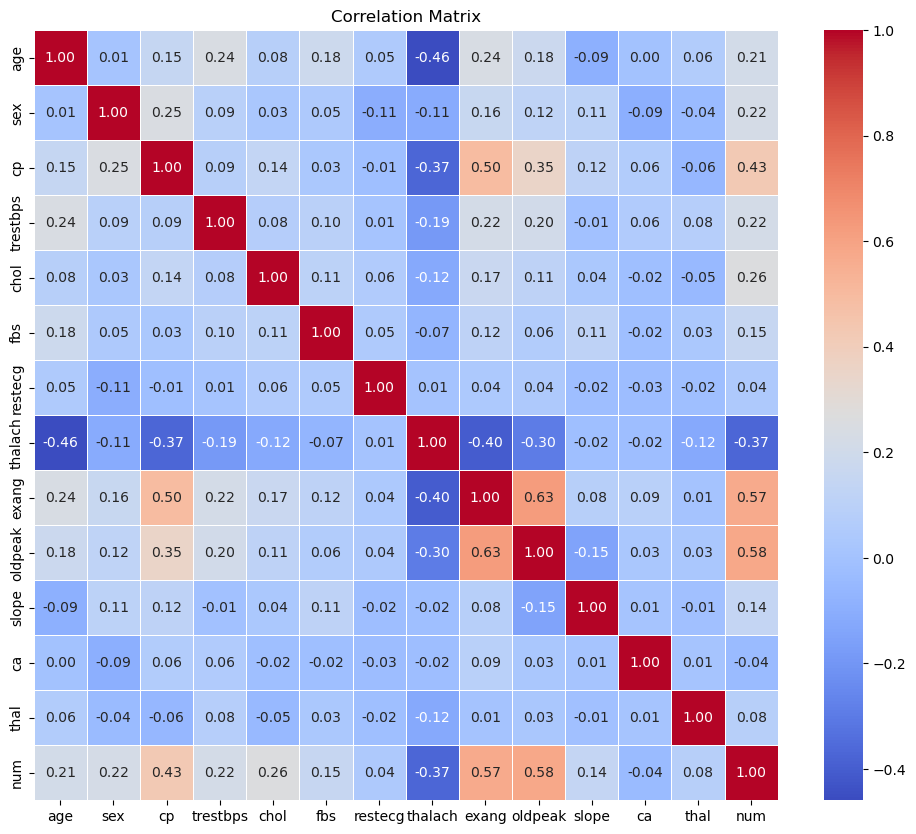

In [13]:
# Menghitung matriks korelasi
correlation_matrix = df.corr()

# Menampilkan visualisasi korelasi menggunakan heatmap
plt.figure(figsize=(12, 10))  # Mengatur ukuran gambar plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)  # Membuat heatmap dengan nilai korelasi diannotasi
plt.title('Correlation Matrix')  # Menambahkan judul pada plot
plt.show()  # Menampilkan plot

In [14]:
# Analisis target
y = df["num"]  # Memilih kolom "num" sebagai target untuk analisis

# Menampilkan jumlah nilai unik dalam kolom "num"
target_temp = df.num.value_counts()  # Menghitung jumlah nilai unik dalam kolom "num"
print(target_temp)  # Menampilkan hasil jumlah nilai unik

0    188
1     37
3     28
2     26
4     15
Name: num, dtype: int64


In [15]:
atribut = df.drop("num",axis=1)  # Menghapus kolom "num" dari atribut untuk X (variabel independen)
target = df["num"]  # Memilih kolom "num" sebagai target untuk Y (variabel dependen)

# Pembagian data menjadi data latih dan data uji
X_train, X_test, Y_train, Y_test = train_test_split(atribut, target, test_size=0.20, random_state=0)

In [16]:
print(X_train.shape)  # Menampilkan ukuran X_train (jumlah baris dan kolom)
print(X_test.shape)   # Menampilkan ukuran X_test (jumlah baris dan kolom)

(235, 13)
(59, 13)


In [17]:
print(Y_train.shape)  # Menampilkan ukuran Y_train (jumlah baris)
print(Y_test.shape)   # Menampilkan ukuran Y_test (jumlah baris)

(235,)
(59,)


### Konstruksi Data
### Oversampling SMOTE

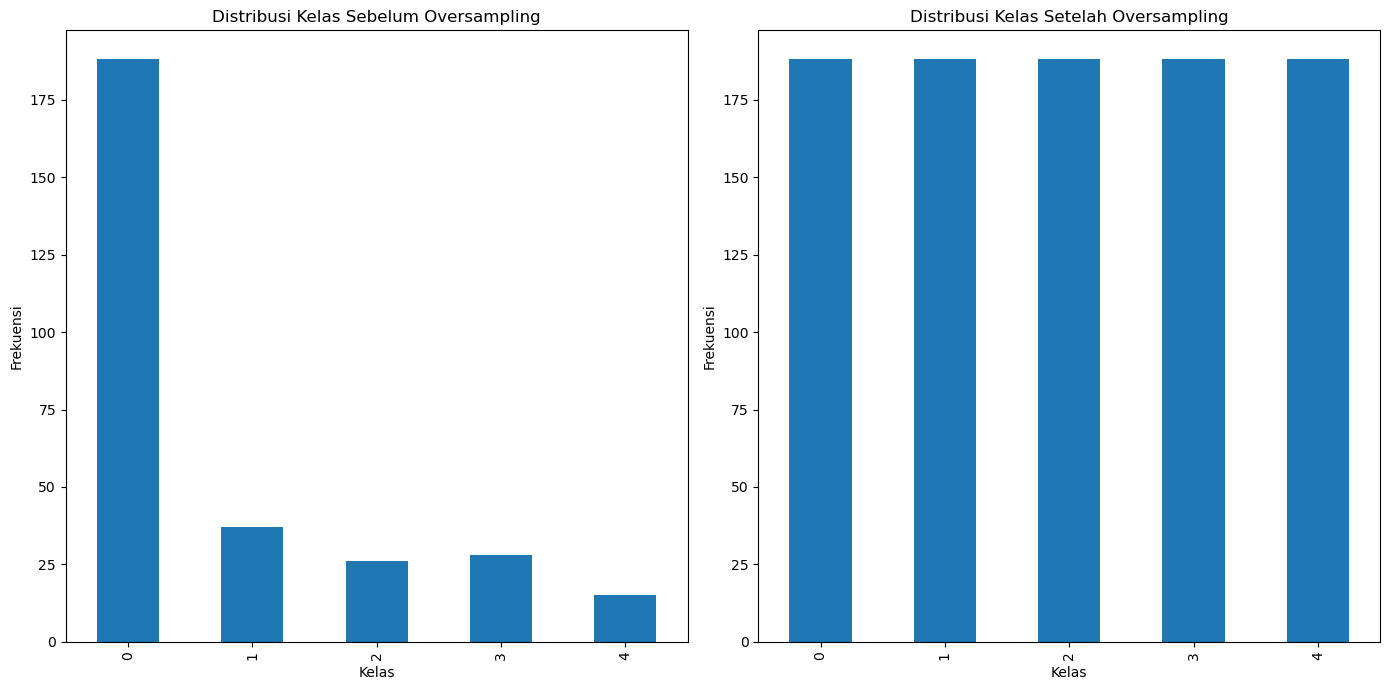

In [18]:
# Plot distribusi kelas sebelum oversampling
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
y.value_counts().sort_index().plot(kind='bar', title='Distribusi Kelas Sebelum Oversampling')  # Menampilkan plot bar distribusi kelas sebelum oversampling
plt.xlabel('Kelas')
plt.ylabel('Frekuensi')

# Menerapkan SMOTE untuk oversampling
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(atribut, target)  # Melakukan oversampling dengan SMOTE

# Plot distribusi kelas setelah oversampling
plt.subplot(1, 2, 2)
y_res.value_counts().sort_index().plot(kind='bar', title='Distribusi Kelas Setelah Oversampling')  # Menampilkan plot bar distribusi kelas setelah oversampling
plt.xlabel('Kelas')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

In [19]:
## OPSIONAL
# Normalisasi atau standarisasi fitur jika diperlukan
scaler = StandardScaler()
X_res = scaler.fit_transform(X_res)  # Menormalisasi atau standarisasi fitur menggunakan StandardScaler

# Membagi data menjadi set pelatihan dan set pengujian setelah oversampling
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

## Pemodelan untuk beberapa model algoritma



### Naive Bayes

In [22]:
# NAIVE BAYES
nb = GaussianNB()  # Membuat objek model Naive Bayes dengan GaussianNB
nb.fit(X_train, y_train)  # Melatih model dengan data pelatihan
Y_pred_nb = nb.predict(X_test)  # Memprediksi kelas menggunakan data uji

score_nb = round(accuracy_score(Y_pred_nb, y_test) * 100, 2)  # Menghitung dan membulatkan akurasi model
print("Akurasi : " + str(score_nb) + " %")  # Menampilkan akurasi model

Akurasi : 30.85 %


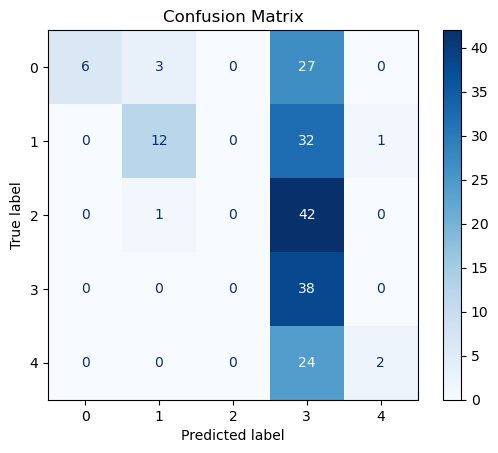

In [23]:
# Membuat confusion matrix untuk model Naive Bayes
cm = confusion_matrix(y_test, Y_pred_nb)  # Menghitung confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)  # Membuat objek untuk menampilkan confusion matrix
disp.plot(cmap=plt.cm.Blues)  # Menampilkan confusion matrix dengan skema warna Blues
plt.title('Confusion Matrix')  # Memberikan judul pada plot
plt.show()  # Menampilkan plot

### Logistic Regression

In [20]:
# LOGISTIC REGRESSION
lr = LogisticRegression()  # Membuat objek model Regresi Logistik
lr.fit(X_train, y_train)  # Melatih model dengan data pelatihan
Y_pred_lr = lr.predict(X_test)  # Memprediksi kelas menggunakan data uji

score_lr = round(accuracy_score(Y_pred_lr, y_test) * 100, 2)  # Menghitung dan membulatkan akurasi model
print("Akurasi : " + str(score_lr) + " %")  # Menampilkan akurasi model

Akurasi : 61.7 %


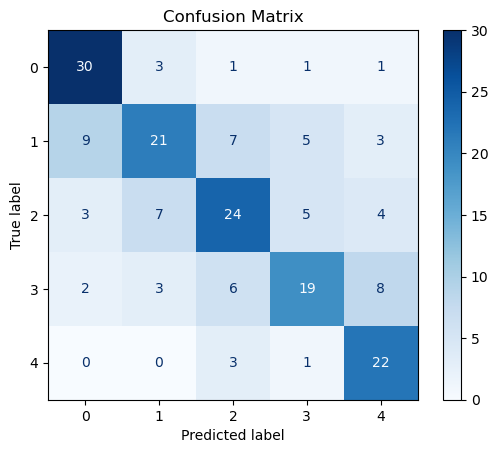

In [21]:
# Membuat confusion matrix untuk model Regresi Logistik
cm = confusion_matrix(y_test, Y_pred_lr)  # Menghitung confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)  # Membuat objek untuk menampilkan confusion matrix
disp.plot(cmap=plt.cm.Blues)  # Menampilkan confusion matrix dengan skema warna Blues
plt.title('Confusion Matrix')  # Memberikan judul pada plot
plt.show()  # Menampilkan plot

### Support Vector Machine (SVM)

In [24]:
# SVM
from sklearn import svm

sv = svm.SVC(kernel='linear')  # Membuat objek model SVM dengan kernel linear
sv.fit(X_train, y_train)  # Melatih model dengan data pelatihan
Y_pred_svm = sv.predict(X_test)  # Memprediksi kelas menggunakan data uji

score_svm = round(accuracy_score(Y_pred_svm, y_test) * 100, 2)  # Menghitung dan membulatkan akurasi model
print("Akurasi : " + str(score_svm) + " %")  # Menampilkan akurasi model

Akurasi : 61.17 %


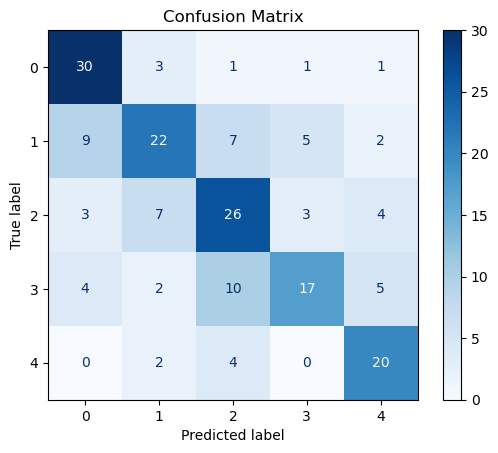

In [25]:
# Membuat confusion matrix untuk model SVM
cm = confusion_matrix(y_test, Y_pred_svm)  # Menghitung confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)  # Membuat objek untuk menampilkan confusion matrix
disp.plot(cmap=plt.cm.Blues)  # Menampilkan confusion matrix dengan skema warna Blues
plt.title('Confusion Matrix')  # Memberikan judul pada plot
plt.show()  # Menampilkan plot

### Decision Tree

In [28]:
# DECISION TREE
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0

# Mencari nilai random_state dengan akurasi tertinggi
for x in range(500):
    dt = DecisionTreeClassifier(random_state=x)  # Membuat objek model Decision Tree dengan random_state yang berbeda
    dt.fit(X_train, y_train)  # Melatih model dengan data pelatihan
    Y_pred_dt = dt.predict(X_test)  # Memprediksi kelas menggunakan data uji
    current_accuracy = round(accuracy_score(Y_pred_dt, y_test) * 100, 2)  # Menghitung akurasi model saat ini
    if current_accuracy > max_accuracy:
        max_accuracy = current_accuracy
        best_x = x  # Menyimpan nilai random_state terbaik

# Menggunakan model Decision Tree dengan random_state terbaik
dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train, y_train)  # Melatih ulang model dengan random_state terbaik
Y_pred_dt = dt.predict(X_test)  # Memprediksi kelas menggunakan data uji

score_dt = round(accuracy_score(Y_pred_dt, y_test) * 100, 2)  # Menghitung dan membulatkan akurasi model
print("Akurasi : " + str(score_dt) + " %")  # Menampilkan akurasi model

Akurasi : 76.6 %


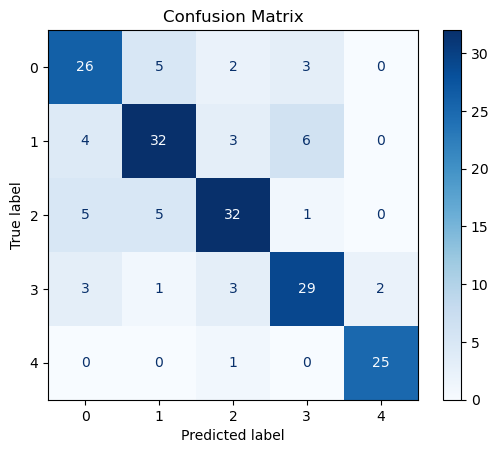

In [29]:
# Membuat confusion matrix untuk model Decision Tree
cm = confusion_matrix(y_test, Y_pred_dt)  # Menghitung confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)  # Membuat objek untuk menampilkan confusion matrix
disp.plot(cmap=plt.cm.Blues)  # Menampilkan confusion matrix dengan skema warna Blues
plt.title('Confusion Matrix')  # Memberikan judul pada plot
plt.show()  # Menampilkan plot

### K-Nearest Neighbor (KNN)

In [26]:
# KNN
knn = KNeighborsClassifier(n_neighbors=3)  # Membuat objek model KNN dengan 3 tetangga terdekat
knn.fit(X_train, y_train)  # Melatih model dengan data pelatihan
Y_pred_knn = knn.predict(X_test)  # Memprediksi kelas menggunakan data uji

score_knn = round(accuracy_score(Y_pred_knn, y_test) * 100, 2)  # Menghitung dan membulatkan akurasi model
print("Akurasi : " + str(score_knn) + " %")  # Menampilkan akurasi model

Akurasi : 79.79 %


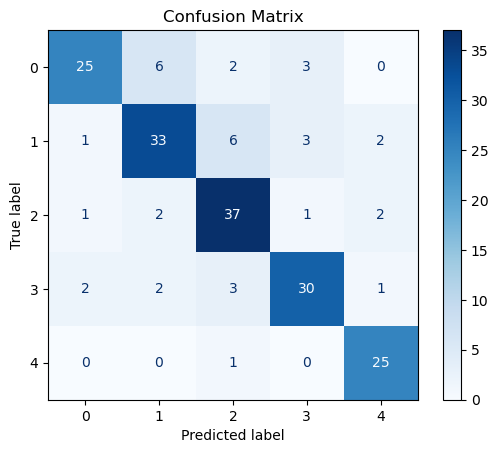

In [27]:
# Membuat confusion matrix untuk model KNN
cm = confusion_matrix(y_test, Y_pred_knn)  # Menghitung confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)  # Membuat objek untuk menampilkan confusion matrix
disp.plot(cmap=plt.cm.Blues)  # Menampilkan confusion matrix dengan skema warna Blues
plt.title('Confusion Matrix')  # Memberikan judul pada plot
plt.show()  # Menampilkan plot

# Akurasi masing-masing model yang telah dijalankan

In [30]:
scores = [score_nb, score_lr, score_svm, score_dt, score_knn]
algorithms = ["Naive Bayes", "Logistic Regression", "Support Vector Machine", "Decision Tree", "K-Nearest Neighbors"]

# Menampilkan akurasi(%) masing-masing model
for i in range(len(algorithms)):
    print("Akurasi Model " + algorithms[i] + " : " + str(scores[i]) + " %")

Akurasi Model Naive Bayes : 30.85 %
Akurasi Model Logistic Regression : 61.7 %
Akurasi Model Support Vector Machine : 61.17 %
Akurasi Model Decision Tree : 76.6 %
Akurasi Model K-Nearest Neighbors : 79.79 %


# Visualisasi evaluasi model menggunakan Plot

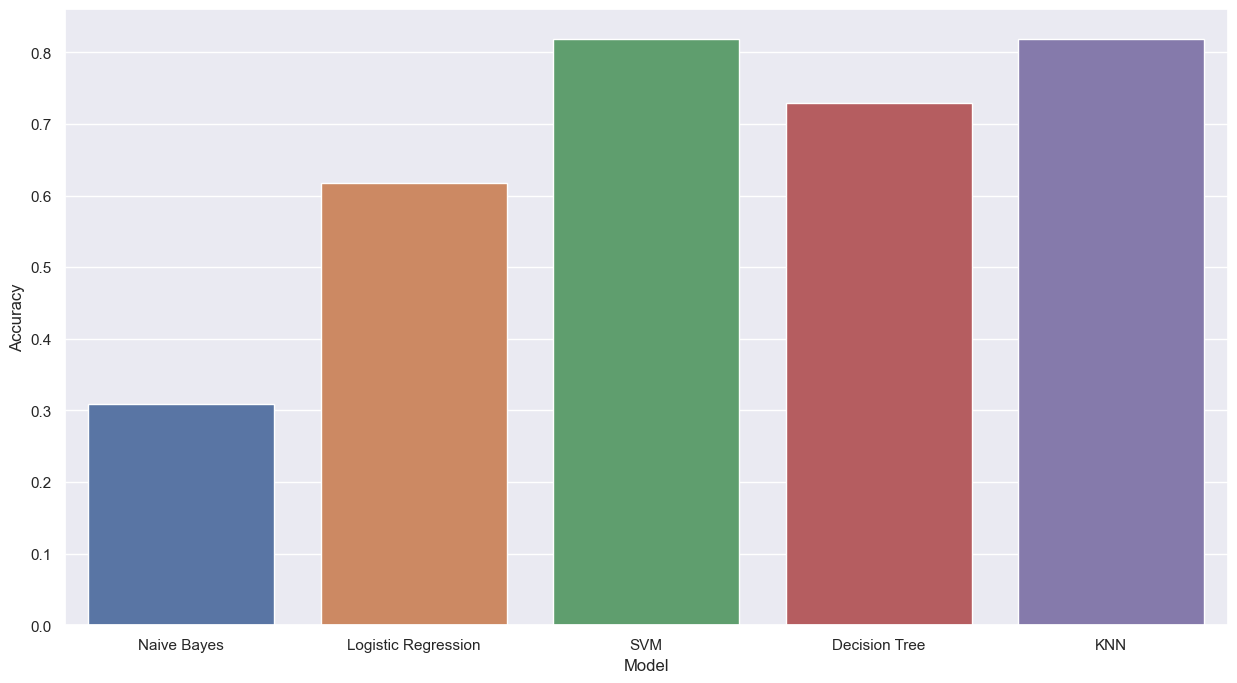

In [31]:
# Membangun dan mengevaluasi berbagai model klasifikasi
models = {
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier()
}

# Menyimpan hasil akurasi
results = []

# Melatih setiap model dan menghitung akurasi
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Melatih model dengan data pelatihan
    y_pred = model.predict(X_test)  # Memprediksi kelas menggunakan data uji
    accuracy = accuracy_score(y_test, y_pred)  # Menghitung akurasi model
    results.append((model_name, accuracy))  # Menyimpan hasil akurasi

# Membuat DataFrame dari hasil
results_df = pd.DataFrame(results, columns=["Model", "Accuracy"])

# Menampilkan barplot akurasi model
sns.set(rc={'figure.figsize':(15,8)})  # Mengatur ukuran gambar plot
plt.xlabel("Model")  # Memberi label sumbu X
plt.ylabel("Accuracy score")  # Memberi label sumbu Y
sns.barplot(x='Model', y='Accuracy', data=results_df)  # Membuat barplot
plt.show()  # Menampilkan plot

## Kesimpulan

Berdasarkan hasil penelitian menggunakan dataset Hungarian untuk klasifikasi penyakit jantung, beberapa model klasifikasi telah dievaluasi dan dibandingkan berdasarkan akurasi mereka. Berikut adalah analisis singkat untuk masing-masing model:

1. **K-Nearest Neighbors (KNN)**: Model ini mencapai akurasi tertinggi, yaitu 79.79%. KNN bekerja dengan cara mengklasifikasikan data berdasarkan mayoritas dari tetangga terdekatnya, yang cocok untuk kasus di mana pola dalam data memiliki relevansi spasial yang kuat.

2. **Decision Tree**: Dengan akurasi sebesar 76.6%, Decision Tree menghasilkan hasil yang solid. Model ini memisahkan data berdasarkan serangkaian keputusan berhirarki, memungkinkan interpretasi yang lebih mudah dan intuitif dari proses pengambilan keputusan.

3. **Logistic Regression** dan **Support Vector Machine (SVM)**: Kedua model ini memiliki akurasi yang relatif serupa, masing-masing 61.7% dan 61.17%. Logistic Regression cocok untuk interpretasi probabilitas klasifikasi, sementara SVM berfokus pada menemukan hyperplane terbaik yang memisahkan kelas dalam ruang fitur.

4. **Naive Bayes**: Model ini menunjukkan akurasi paling rendah, yaitu 30.85%. Naive Bayes mengasumsikan independensi antar fitur, yang dapat menjadi sederhana tetapi tidak selalu cocok untuk dataset dengan ketergantungan yang kompleks antar fitur.

Dalam konteks klasifikasi penyakit jantung, pemilihan model harus mempertimbangkan tidak hanya akurasi tetapi juga interpretabilitas, kecepatan pelatihan, dan kemampuan untuk menangani karakteristik khusus dari dataset tersebut. Evaluasi model secara menyeluruh membantu memahami kekuatan dan kelemahan masing-masing algoritma dalam aplikasi medis ini. Tetapi dalam penelitian ini menunjukkan bahwa dalam konteks klasifikasi penyakit jantung menggunakan dataset Hungarian, model K-Nearest Neighbors (KNN) dapat dianggap sebagai pilihan yang lebih baik berdasarkan kriteria akurasi yang diperoleh dalam penelitian ini.